In [33]:
import re
import json
import emoji
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker

In [35]:
with open('iPhone15pro_Raw_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [36]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
#initializing spellchecker
spell = SpellChecker()

# Custom list of stopwords to retain
custom_stopwords = ["have", "inside", "not", "no", "never", "none", "nobody", "no one", "nowhere", "neither", "nor", "hardly", "scarcely", "barely", "rarely",]
iphone_terms = {
    "iphone", "ios", "siri", "apple", "icloud", "ipad", "airpods", "apple watch", "macbook", "app store",
    "imessage", "facetime", "macos", "watchos", "tvos", "homepod", "airtag", "apple pay", "apple music",
    "apple tv", "apple arcade", "apple fitness+", "apple news", "apple card", "apple books", "carplay",
    "a series", "m1", "m2", "true tone", "retina", "liquid retina", "super retina", "oled", "pro motion",
    "face id", "touch id", "animoji", "memoji", "night mode", "deep fusion", "smart hdr", "dolby vision",
    "5g", "lte", "dual sim", "esim", "lightning port", "mag safe", "airplay", "airdrop", "hevc", "a14 bionic",
    "a15 bionic", "a16 bionic", "thunderbolt", "usb-c", "wi-fi 6", "bluetooth 5.0", "spatial audio",
    "lossless audio", "apple silicon", "apple pencil", "ip68", "water resistant", "dust resistant",
    "ceramic shield", "stainless steel", "aluminum", "glass back", "wireless charging", "fast charge",
    "dual camera", "triple camera", "telephoto", "wide angle", "ultra wide", "portrait mode", "lidar scanner",
    "optical zoom", "digital zoom", "smart connector", "privacy", "security", "safari", "maps",
    "health", "wallet", "notes", "reminders", "calendar", "photos", "camera", "mail", "weather",
    "find my", "shortcuts", "screentime", "voiceover", "switch control", "live listen", "magsafe",
    "iphone se", "iphone xr", "iphone xs", "iphone 11", "iphone 12", "iphone 13", "iphone 14",
    "iphone 14 pro", "iphone 14 pro max", "ios 16", "ios 15", "ios 14", "apple one", "icloud drive",
    "icloud photos", "keynote", "numbers", "pages", "airpods pro", "airpods max", "homekit",
    "home app", "fitness app", "tv app", "game center", "sign in with apple", "apple id",
    "family sharing", "screen time", "handoff", "universal control", "sidecar", "siri shortcuts",
    "siri suggestions", "focus mode", "live text", "visual lookup", "privacy report", "tracking prevention",
    "app privacy", "icloud private relay", "hide my email", "app library", "widgets", "face time links",
    "spatial audio", "share play", "memojis", "threaded messages", "pinned conversations",
    "apple cash", "apple stock", "true depth camera", "haptic touch", "quicktake", "night shift",
    "control center", "apple loop", "cinematic mode", "prores", "pro raw", "user-friendly", "intuitive", "seamless",
    "innovative", "engaging", "customizable", "flexible", "accessible", "convenient", "effortless", "satisfied",
    "impressed", "disappointed", "frustrated", "delighted", "excited", "annoyed", "happy", "unhappy", "content",
    "angry", "joyful", "trust", "distrust", "anticipation", "surprise", "daily driver", "heavy usage", "light usage",
    "battery life", "screen time", "app usage", "social media", "gaming", "streaming", "photography", "video recording",
    "content creation", "work from home", "remote work", "learning", "fitness tracking", "health monitoring", "navigation",
    "travel", "communication", "entertainment", "upgrade", "switch", "brand loyalty", "repeat purchase", "recommendation",
    "word of mouth", "value for money", "cost-effective", "premium", "overpriced", "budget-friendly", "investment", "ecosystem",
    "compatibility", "privacy concerns", "security issues", "durability concerns", "repairability", "software bugs", "hardware failure",
    "customer service", "warranty", "data protection", "screen damage", "water damage"
}



In [38]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = emoji.demojize(text)
    text = re.sub(r'[^\w\s.]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)

    stop_words = set(stopwords.words("english"))
    for word in custom_stopwords:
        stop_words.discard(word)

   # Modify the filtering process to retain iPhone terms
    cleaned_words = [word for word in words if word not in stop_words and len(word) > 1 or word in iphone_terms]

    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text


In [39]:
def clean_comments(comments):
    for comment in comments:
        comment["body"] = clean_text(comment.get("body", ""))
        if "replies" in comment:
            clean_comments(comment["replies"])  # Recursively clean replies

def extract_text_from_comments(comments):
    text = ""
    for comment in comments:
        text += " " + comment.get("body", "")
        if "replies" in comment:
            text += extract_text_from_comments(comment["replies"])
    return text

# Clean the text data
for post in data["posts"]:
    post["title"] = clean_text(post.get("title", ""))
    post["self_text"] = clean_text(post.get("self_text", ""))
    clean_comments(post.get("comments", []))  # Clean all levels of comments

# Store the cleaned data in a new JSON file
with open("iphone15pro_CD.json", "w", encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [41]:
# Generate WordCloud
combined_text = " ".join([post['title'] + " " + post['self_text'] + extract_text_from_comments(post.get("comments", [])) for post in data["posts"]])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)


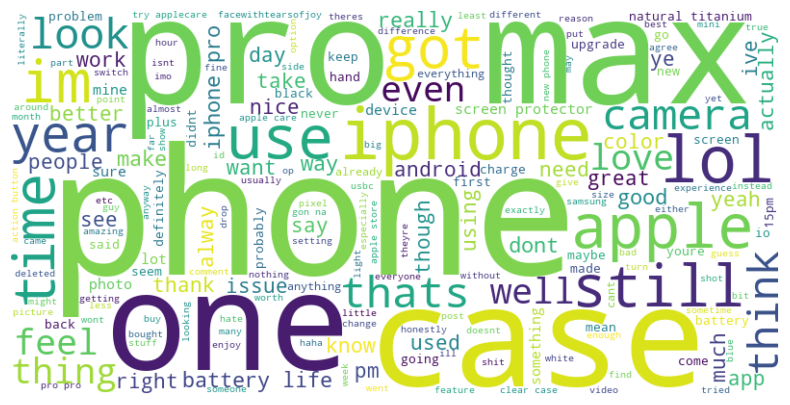

In [42]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()